In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as snsdef 

'''
Train a Neural Network to sum 3 numbers. Here, we are performing 
a form of data regression, where we train our model to learnquit
the correct sum of 3 numbers.
'''

'''
Generate data for training and testing
'''
def generate_data(low, high, n_rows, n_cols):
  # produces a n_rows x n_cols matrix of values between
  # 'low' and 'high'
  x_train = np.random.randint(low, high, size=(n_rows, n_cols))
  
  # sum up values for each row
  # axis=1 means collapse along columns
  # keepdims=True keeps the original dimension (which is
  # array within an array - the form that Tensorflow wants) 
  y_train = np.sum(x_train, axis=1, keepdims=True)

  return x_train, y_train

# rd = np.random.seed(123)

# prepare training data
x_train, y_train = generate_data(-100, 100, 300, 3)

# prepare testing data
x_test, y_test = generate_data(-100, 100, 20, 3)
print(x_train)
print(y_train)



[[ -76   85   88]
 [  15   72  -59]
 [   1  -82   96]
 [-100   60   58]
 [ -80  -90  -10]
 [  71  -59   33]
 [  88  -47   89]
 [ -85   25   26]
 [ -36   -3   70]
 [  53   20   -9]
 [   1   57   86]
 [  19  -99   91]
 [ -20  -23   58]
 [  29   88   54]
 [ -90  -92   29]
 [ -42   18   35]
 [ -46  -43  -68]
 [ -63   46   -2]
 [  89  -42  -73]
 [  94   66   -9]
 [  28  -68   16]
 [  78    9  -35]
 [-100  -57  -55]
 [ -68   18    6]
 [  82   34   54]
 [  47  -76   99]
 [ -12  -26   93]
 [ -33   11  -33]
 [ -31  -66   87]
 [  92   87   57]
 [ -41   45   33]
 [ -25   60  -87]
 [  24  -97  -16]
 [  78  -51  -93]
 [  81   72  -17]
 [ -89   57   93]
 [  61  -92   10]
 [ -90   22   72]
 [  56   29  -70]
 [  49  -27    5]
 [  89  -95  -70]
 [ -10  -34   87]
 [ -54   20  -65]
 [ -59  -63   -2]
 [ -42   84  -55]
 [ -21   99   26]
 [  55  -80  -32]
 [  74  -92  -31]
 [  19  -14   94]
 [ -66    7   61]
 [  26  -95  -49]
 [   1   61  -18]
 [   1   36   78]
 [ -87   19   71]
 [  25  -30  -28]
 [  73   3

In [3]:
'''
Create our Neural Network model.
'''
def create_model(n_features):
  model = tf.keras.Sequential()

  # can add multiple hidden-layers to our model
  # our activation function is ReLU
  model.add(tf.keras.layers.Dense(50, 
    input_shape=(n_features,), activation='relu'))
  
  # output only has 1 neuron as that's the sum of our value for each row
  model.add(tf.keras.layers.Dense(1))

  # a Keras model must be compiled before it can be used
  # the optimizer is a gradient-descent algorithm
  # our loss function is mean-square error (loss='mse')
  model.compile(optimizer='adam', loss='mse')
  return model


# create the NN model
model = create_model(n_features=x_train.shape[1])
x_train.shape[0]

300

In [4]:
'''
Train our Neural Network model.
'''
def train_model(model, x_train, y_train, epochs):
  # train our model by asking it to learn from the
  # training data; we want it to learn the "relation"
  # between the x_train and y_train data
  return model.fit(x_train, y_train, epochs=epochs)




  
# training model using train set
history = train_model(model, x_train, y_train, epochs=100)

Epoch 1/100


2023-01-13 12:55:52.015428: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 801us/step - loss: 9653.7520
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 8703.2012
Epoch 3/100
10/10 [==============================] - 0s 666us/step - loss: 7752.6406
Epoch 4/100
10/10 [==============================] - 0s 848us/step - loss: 6889.2266
Epoch 5/100
10/10 [==============================] - 0s 762us/step - loss: 6082.8691
Epoch 6/100
10/10 [==============================] - 0s 689us/step - loss: 5330.8916
Epoch 7/100
10/10 [==============================] - 0s 650us/step - loss: 4594.8564
Epoch 8/100
10/10 [==============================] - 0s 676us/step - loss: 3932.2849
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 3299.6262
Epoch 10/100
10/10 [==============================] - 0s 893us/step - loss: 2725.7495
Epoch 11/100
10/10 [==============================] - 0s 637us/step - loss: 2206.9355
Epoch 12/100
10/10 [==============================] - 0s 570us/step - loss: 173

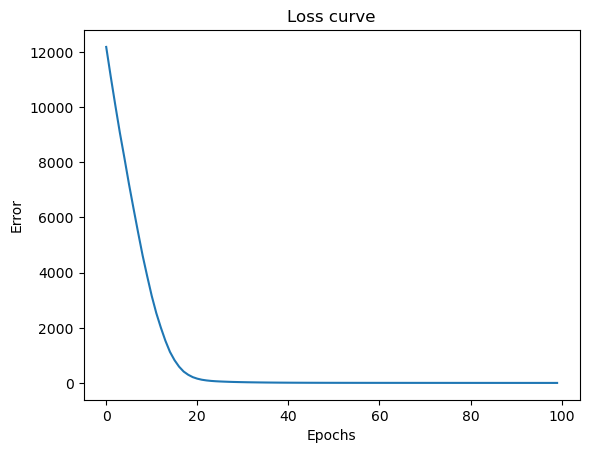

In [12]:
'''
Plot the loss curve
'''
def plot_loss(history):
  _, ax = plt.subplots()

  plt.plot(history.history['loss'])
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Error')
  ax.set_title('Loss curve')

  plt.show()
  
# plot training loss curve
plot_loss(history)

In [13]:
'''
Test our Neural Network model.
'''
def test_model(model, x_test, y_test):
  # return the average loss between actual and predicted values
  # as computed by the loss-function
  return model.evaluate(x=x_test, y=y_test)


  # test model using test set
loss = test_model(model, x_test, y_test)
print('Loss = {}\n'.format(loss))

1/1 [==============================] - 0s 35ms/step - loss: 4.5109
Loss = 4.510936737060547



In [5]:
print(y_test)

[[  70]
 [  62]
 [ 164]
 [ 122]
 [ 170]
 [  63]
 [ -19]
 [ -19]
 [  19]
 [  12]
 [  55]
 [  36]
 [ 145]
 [  99]
 [-170]
 [-153]
 [ 165]
 [  66]
 [ -13]
 [ -50]]


In [14]:

'''
Show ground-truths vs predictions.
'''
def show_diffs(model, x_test, y_test):
  # returns an array of predicted values
  predictions = model.predict(x=x_test)

  # display the actual and predicted values
  # for each row of test data
  for i in np.arange(len(predictions)):
    print('Data: {}, Actual: {}, Predicted: {}'.format(\
      x_test[i], y_test[i], predictions[i]))

    # manual evaluation
show_diffs(model, x_test, y_test)

1/1 [==============================] - 0s 21ms/step
Data: [ 80  75 -34], Actual: [121], Predicted: [117.62976]
Data: [ 82 -69 -43], Actual: [-30], Predicted: [-30.414125]
Data: [-23 -32 -73], Actual: [-128], Predicted: [-124.28412]
Data: [-29   8 -41], Actual: [-62], Predicted: [-63.21537]
Data: [-88 -83  78], Actual: [-93], Predicted: [-95.317825]
Data: [-51 -58 -16], Actual: [-125], Predicted: [-126.13779]
Data: [-55 -77 -96], Actual: [-228], Predicted: [-224.43797]
Data: [ 57 -58 -48], Actual: [-49], Predicted: [-50.9944]
Data: [51  2 41], Actual: [94], Predicted: [92.814354]
Data: [ 63  53 -88], Actual: [28], Predicted: [28.924183]
Data: [-80 -11  -3], Actual: [-94], Predicted: [-91.379074]
Data: [-61 -58 -42], Actual: [-161], Predicted: [-160.72795]
Data: [-52  74  46], Actual: [68], Predicted: [64.696335]
Data: [ 39 -65  21], Actual: [-5], Predicted: [-3.6276917]
Data: [ -7   7 -68], Actual: [-68], Predicted: [-68.716385]
Data: [  7  26 -14], Actual: [19], Predicted: [20.366804]
